Критерий остановки находится в функции ifstop
В случае нерегулярных кодов реализация U и V в виде двойного массива, в первой ячейке текущее значение LRR, а во
второй либо степень либо м-во вершин из DC с которыми она соединена
В случае регулярных можно считать только для одной вершины из Dv и Dc так как они распределены одинаково

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
from math import e, log

In [17]:
sigma = 0.5
size_of_sample = 1000
max_l = 1000
l = 0
H = np.array([[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], 
             [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0], 
             [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
             [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
             [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1],
             [0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]])

In [69]:
def dc_update(L_j_i):
    L_i_j = [[0 for i in range(12)] for j in range(6)]
    for i in range(len(L_i_j)):
        for j in range(len(L_i_j[0])):
            tmp = 1
            for k in range(len(L_i_j[0])):
                if (k != j):
                    if (H[i][k]):
                        tmp *= np.tanh(L_j_i[k][i] / 2)
            L_i_j[i][j] = float(2 * np.arctanh(tmp))
    return L_i_j
                

In [70]:
def dv_update(L_i_j, L_j_i, L_j):
    for i in range(len(L_j_i)):
        for j in range(len(L_j_i[0])):
            tmp = L_j[i]
            for k in range(len(L_j_i[0])):
                if (k != j):
                    if (H[k][i]):
                        tmp += L_i_j[k][i]
            L_j_i[i][j] = float(tmp)
    return L_j_i
    

In [86]:
def stop_kriteria(L_j_i, L_i_j, H, l):
    mv = np.zeros(12)
    for j in range(len(L_j_i)):
        tmp = L_j[j]
        for i in range(len(L_j_i[0])):
            if (H[i][j]):
                tmp += L_i_j[i][j]
        if (tmp < 0):
            mv[j] = 1
        else:
            mv[j] = 0
    ans[l] = np.mean(L_i_j) / np.std(L_i_j)
    if (np.dot(mv, H.T).all() == 0):
        print("got_it\n")
        print(mv)
        print(l)
        return True
    elif (l == max_l):
        print("max_iter_reach")
        return False
    return 4

In [97]:
ans = np.zeros(max_l + 1)
l = 0



nu = np.random.normal(0, sigma, 12)
x= np.random.randint(0,2,12)
v = [-1 if (i == 1) else 1 for i in x]
y = [v[i] + nu[i] for i in range(12)]
L_j = [2 * i / (sigma ** 2) for i in y]
L_j_i = [[L_j[j] if H[i][j] == 1 else 0 for i in range(6)] for j in range(12)]
L_i_j = [[0 for i in range(12)] for j in range(6)]
L_j_i
while True:
    L_i_j = dc_update(L_j_i)
    L_j_i = dv_update(L_i_j, L_j_i, L_j)
    l += 1
    if (stop_kriteria(L_j_i, L_i_j, H, l) != 4):
        break

max_iter_reach


<AxesSubplot: >

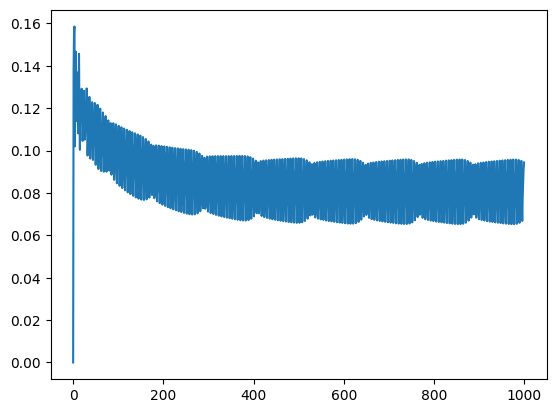

In [98]:
import seaborn as sns
sns.lineplot(ans)

In [33]:
print(ans)

[ 0. nan nan ... nan nan nan]
